In [1]:
# Basic AiiDA database analysis notebook

# feel free to contribute, adapted and share.
__contributors__ = "Jens Broeder, Gregor Michalicek, Giovanni Pizzi"

# Goal: make it nice and shiny that if the hide_code extension is used all results can be exported
# as a very nice pdf. (https://github.com/kirbs-/hide_code)
print '\033[1m' + 'Basic analysis of the current AiiDA database:' + '\033[1m'

Basic analysis of the current AiiDA database:


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
from aiida import load_profile
load_profile()

from aiida.orm import QueryBuilder as QB
from aiida.orm import Node, User, CalcJobNode, Computer, Code
from aiida.plugins import DataFactory

from collections import Counter
from aiida.common.constants import elements as PeriodicTableElements
import time
from pprint import pprint

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
# general plot properties:
figuresize=(18, 4)

In [6]:
# size of the db on disc might be nice to know.
# One could check in postgres. is there an other way?

In [7]:
# query for all nodes
print('Information on nodes in the DB: \n')
now = time.strftime("%c")
print('last executed on {}'.format(now))
q = QB()
q.append(Node, project=['id', 'ctime', 'mtime', 'node_type'], tag='node')
q.append(User, with_node='node', project='email')
#q.limit(100)
t = time.time()
res = q.all()
elapsed = time.time() - t
totalnodes = len(res)
print("Total number of nodes in the database: {} (retrieved in {} s.)".format(totalnodes, elapsed))

Information on nodes in the DB: 

last executed on Tue Aug  7 07:02:29 2018
Total number of nodes in the database: 540046 (retrieved in 8.51335597038 s.)


In [8]:
users = Counter([r[4] for r in res])
print("Users:")
for count, email in sorted((v, k) for k, v in users.items())[::-1]:
    print("* {} created {} nodes".format(email, count))

Users:
* j.broeder@fz-juelich.de created 540046 nodes


In [9]:
types = Counter([r[3] for r in res])
print("Node types:")

for count, typestring in sorted((v, k) for k, v in types.items())[::-1]:
    print("* {}: {} nodes".format(typestring, count))

Node types:
* data.structure.StructureData.: 388758 nodes
* calculation.job.fleur.inpgen.FleurinputgenCalculation.: 80380 nodes
* data.remote.RemoteData.: 30454 nodes
* data.folder.FolderData.: 19935 nodes
* data.fleur.fleurinp.FleurinpData.: 19460 nodes
* data.parameter.ParameterData.: 392 nodes
* calculation.work.WorkCalculation.: 337 nodes
* data.cif.CifData.: 152 nodes
* calculation.function.FunctionCalculation.: 60 nodes
* calculation.job.fleur.fleur.FleurCalculation.: 45 nodes
* data.int.Int.: 33 nodes
* data.array.kpoints.KpointsData.: 30 nodes
* data.float.Float.: 6 nodes
* code.Code.: 4 nodes


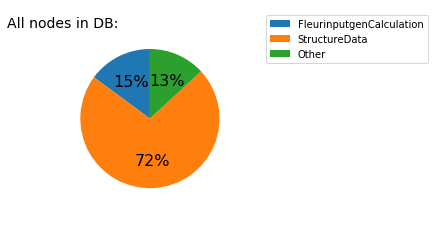

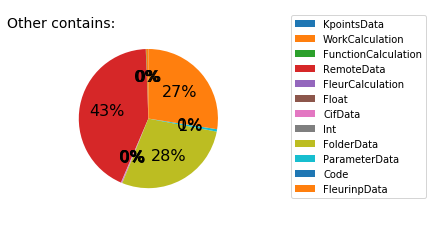

In [10]:
## plot piecharts of nodes:

# The slices will be ordered and plotted counter-clockwise.
labelst = [label.split('.')[-2] for label in types.keys()]
sizest = [nnodes for nnodes in types.values()]
# sizes smaller then x% (x=7) should be ploted together as other 
other = 0
labels_other, sizes_other, sizes = [], [], []
labels = []
other_plot = False
for i, size in enumerate(sizest):
    if size <= totalnodes*7./100.:
        other = other + size
        other_plot = True
        labels_other.append(labelst[i])
        sizes_other.append(size)
    else:
        sizes.append(size)
        labels.append(labelst[i])
if other_plot:
    labels.append('Other')
    sizes.append(other)

    # TODO better color scheme
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
#colorsC = ['yellowgreen', 'gold', 'lightcoral']

fig = plt.figure()
ax1 = fig.gca()

sizesA = sizes
ax1.text(1.0, 1.1, 'All nodes in DB:', ha='center', va='center', fontsize=14)
patches, texts, autotexts = plt.pie(sizesA, #colors=colors,
       autopct='%1.0f%%', shadow=False, startangle=90,
       radius=0.8, center=(2.0, 0), frame=False)

for t in autotexts:
    t.set_size(16)
leg1 = plt.legend(labels, bbox_to_anchor=(1.8, 1), ncol=1, fontsize=10)
#plt.legend(labels, loc="best", ncol=2, fontsize=14)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax1.set_aspect('equal')

fig2 = plt.figure()
ax2 = fig2.gca()

ax2.text(1.0, 1.1,'Other contains:', ha='center', va='center', fontsize=14)
patches, texts, autotexts = plt.pie(sizes_other, #colors=colors,
       autopct='%1.0f%%', shadow=False, startangle=90,
       radius=0.8, center=(2.0, 0), frame=False)

for t in autotexts:
    t.set_size(16)
#leg2 = plt.legend(labels_other, loc="right", ncol=1, fontsize=14)
leg2 = plt.legend(labels_other, bbox_to_anchor=(1.8, 1), ncol=1, fontsize=10)

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax2.set_aspect('equal')

#plt.rcParams['font.size'] = 20.0
#plt.rcParams['text.fontsize'] = 20
#plt.show()

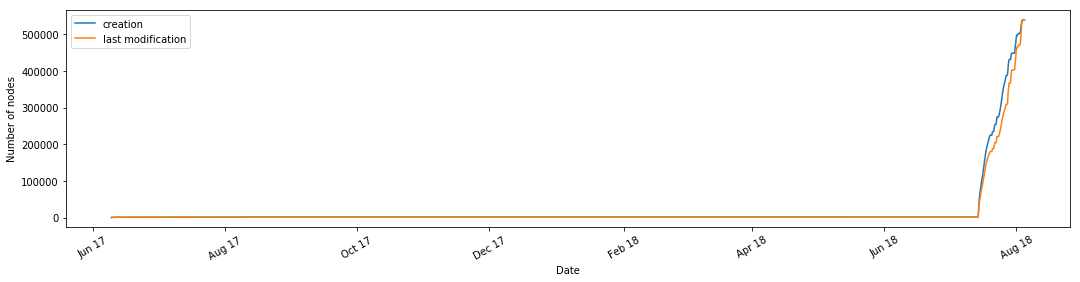

In [11]:
# Histogram by ctime & mtime
ctimes = sorted(r[1] for r in res)
mtimes = sorted(r[2] for r in res)
num_nodes_integrated = range(len(ctimes))
fig, ax = subplots(figsize=figuresize)
plot(ctimes, num_nodes_integrated, label='creation')
plot(mtimes, num_nodes_integrated, label='last modification')
ax.xaxis.set_major_formatter(DateFormatter("%b %y"))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=30)
xlabel("Date")
ylabel("Number of nodes")
legend(loc='best')

In [12]:
from plot_methods.plot_methods import set_plot_defaults, single_scatterplot
from scipy import array

In [13]:
set_plot_defaults?

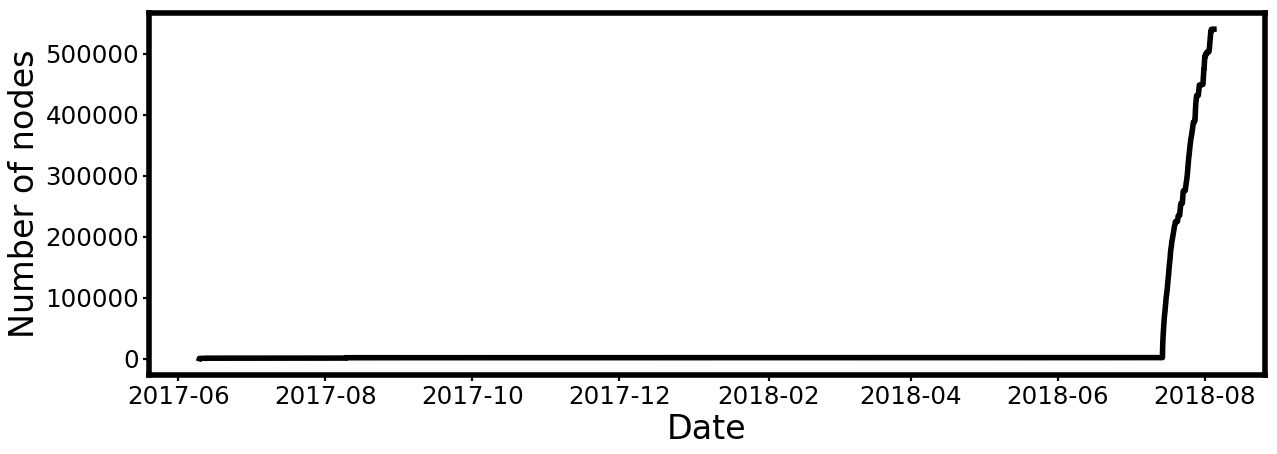

In [14]:
ctimes = sorted(r[1] for r in res)
mtimes = sorted(r[2] for r in res)
num_nodes_integrated = range(len(ctimes))
#fig, ax = subplots(figsize=figuresize)
set_plot_defaults(title_fontsize=16, linewidth=5.0, markersize=4.0, labelfonstsize=30, ticklabelsize=16, axis_linewidth=5.0, 
                  tick_params={'width': 2.0, 'length': 7, 'labelsize': 22, 'size': 5.0}, figsize=(18,6), save_plots=False, save_format='pdf', legend=True)
resp = single_scatterplot(num_nodes_integrated, ctimes, 'Date', 'Number of nodes', '')
#plot(ctimes, num_nodes_integrated, label='creation')
#plot(mtimes, num_nodes_integrated, label='last modification')
#ax.xaxis.set_major_formatter(DateFormatter("%b %y"))
#labels = ax.get_xticklabels()
#plt.setp(labels, rotation=30)
#xlabel("Date")
#ylabel("Number of nodes")
#legend(loc='best')

In [17]:
# more detailed analysis of Codes
print('Codes in the Database:')

q = QB()
q.append(Code)
codes = q.all()
print('\nThe following Codes were found in the database: \n')
for code in codes:
    print(code[0].full_label, code[0].description)
print('\nDetails: \n')
for code in codes:
    pprint(code[0].get_full_text_info())


Codes in the Database:

The following Codes were found in the database: 

[['PK', 87609], ['UUID', u'875c46dd-454b-446e-af3d-bdfcb18c4927'], ['Label', u'inpgen_dev1'], ['Description', u'inpgen of fleur develop branch'], ['Default plugin', u'fleur.inpgen'], ['Type', 'remote'], ['Remote machine', u'local'], ['Remote absolute path', u'/home/broeder/codes/aiida/inpgen/v0.28/develop/inpgen'], ['Prepend text', ''], ['', u'ulimit -s unlimited'], ['', u'start=`date +%s.%N`'], ['Append text', ''], ['', u'end=`date +%s.%N`'], ['', u'runtime=$( echo "$end-$start" | bc -l)'], ['', u'echo "$runtime, $start, $end" >> \'shell.out\'']]
[['PK', 2024], ['UUID', u'2a39153b-3801-4ccd-97e1-b3b6947da32a'], ['Label', u'inpgen_dev'], ['Description', u'inpgen of fleur develop branch'], ['Default plugin', u'fleur.inpgen'], ['Type', 'remote'], ['Remote machine', u'local'], ['Remote absolute path', u'/home/broeder/codes/aiida/inpgen/v0.28/develop/inpgen'], ['Prepend text', ''], ['', u'ulimit -s unlimited'], ['App

In [18]:
# on what computer were they run?
print('Computers in the Database:')

q = QB()
q.append(Computer)
comps = q.all()
print('\nThe following Computers were found in the database: \n')
for computer in comps:
    print('\n' + computer[0].full_text_info)

Computers in the Database:

The following Computers were found in the database: 


Computer name:     local
 * PK:             1
 * UUID:           671a6102-e7e8-45b9-8c7d-550c1d234f3f
 * Description:    my desktop pc i7 
 * Hostname:       localhost
 * Enabled:        True
 * Transport type: local
 * Scheduler type: direct
 * Work directory: /home/{username}/aiida/aiida_run/
 * Shebang:        #!/bin/bash
 * mpirun command: mpirun -np {tot_num_mpiprocs}
 * Default number of cpus per machine: 8
 * Used by:        110883 nodes
 * prepend text:
   # No prepend text.
 * append text:
   # No append text.


In [23]:
import re
# more detailed analysis of Structures
print('More detailed analysis of Structures \n ')
# TODO currently this is very very slow...., get_formula..
# maybe say how many distinged formulae are in the db.
# or realy distinged structures, braivais M different and not connected to other structures.

StructureData = DataFactory('structure')

#t = time.time()
#structures1 = StructureData.query() # this is a lot faster then with qb? # because of django?
#elapsed = time.time() - t
#print "Total number of structures: {} (retrieved in {} s.)".format(len(structures1), elapsed)
t = time.time()
q = QB()
q.append(StructureData)#, project=['extras','pbc'])#,'id', 'sites'])
structures = q.all()  
elapsed = time.time() - t
print("Total number of structures: {} (retrieved in {} s.)".format(len(structures), elapsed))
t = time.time()
#what structures, elements
structure_list = []
element_list = [data['symbol'] for num, data in PeriodicTableElements.items()]
# dont use a dict, we want to keep order of elements
element_count_list = [[element, 0] for element in element_list]
# { element : occurences, ...}
atom_count_dict = {} # { number of atoms1 : occurences, ...}
n_bulk, n_film, n_1d = 0, 0, 0
extra_count_dict = {} # { extra string : occurences, ...}
count_e = 0


for structure in structures:
    extras = structure[0].extras
    formula = extras.get('formula', '')
    #formula = structure[0].get_formula()
    structure_list.append(formula)
    formula_strip = re.sub('[0123456789]', '', formula)#formula.split('0123456789')
    formula_strip = re.findall('[A-Z][^A-Z]*', formula_strip)
    for i, element in enumerate(element_list):
        for formula_el in formula_strip:
            if element == formula_el:# needed because otherwise H, N, O ,F, P, S, K, I
                # will be counted to often
                element_count_list[i][1] = element_count_list[i][1] + 1   
    #add number of atoms to atom_count_dict 
    # TODO more general case: sites is not enough
    #natom = len(structure[0].sites)
    natom = extras.get('natoms', 0)
    atom_count_dict[natom] = atom_count_dict.get(natom, 0) + 1

    # how many 1D 2D 3D:
    # currently only because sqlalcemy sometimes stores structures without attributes
    try:
        pbc = structure[0].pbc
    except AttributeError:
        #print 'error'
        count_e = count_e +1
        pbc = None;
    if pbc:
        if False in pbc:
            # film or 1D
            count = 0
            for pb in pbc:
               if not pb:
                   count = count + 1
            if count == 1:
                n_film = n_film + 1
            else:
                n_1d = n_1d + 1
        else:
            n_bulk = n_bulk +1
    
    # evaluate extras
    extras = structure[0].extras
    for key, val in extras.items():
        string = str(key) + ' : ' + str(val)
        extra_count_dict[string] = extra_count_dict.get(string, 0) + 1
print('{} dummy structures still in the database do to sqlalchemy malfunction'.format(count_e))    
print('\nNumber of structures: 3D : {} , 2D: {} and 1D: {}'.format(n_bulk, n_film, n_1d))

elapsed = time.time() - t
print("(needed {} s.!!!)".format(elapsed))
print("\nExtra keys occurences:")
for occ, extra in sorted((v, k) for k, v in extra_count_dict.items())[:-50:-1]:
    print(" {} : {} ".format(occ, extra))
    # print only first 100?

More detailed analysis of Structures 
 
Total number of structures: 388758 (retrieved in 94.5813288689 s.)
0 dummy structures still in the database do to sqlalchemy malfunction

Number of structures: 3D : 388746 , 2D: 12 and 1D: 0
(needed 10135.0044479 s.!!!)

Extra keys occurences:
 388450 : project : cod inpgen test 
 388444 : type : from cod 
 79943 : inpgen_run : True 
 3999 : natoms : 56 
 3778 : natoms : 160 
 3493 : natoms : 120 
 3432 : natoms : 168 
 3411 : natoms : 96 
 3400 : natoms : 144 
 3367 : natoms : 152 
 3335 : natoms : 192 
 3299 : natoms : 128 
 3264 : natoms : 136 
 3244 : natoms : 156 
 3243 : natoms : 116 
 3233 : natoms : 80 
 3206 : natoms : 132 
 3177 : natoms : 104 
 3175 : natoms : 176 
 3170 : natoms : 112 
 3123 : natoms : 108 
 3088 : natoms : 184 
 3087 : natoms : 148 
 3074 : natoms : 172 
 3072 : natoms : 8 
 3032 : natoms : 124 
 3011 : natoms : 140 
 2927 : natoms : 208 
 2920 : natoms : 200 
 2907 : natoms : 180 
 2878 : natoms : 88 
 2870 : natoms

In [25]:
import json
with open('extra_count_dict_whole_cod.json', 'w') as fp:
    json.dump(extra_count_dict, fp)
with open('atom_count_dict_whole_cod.json', 'w') as fp:
    json.dump(atom_count_dict, fp)
with open('element_count_list_whole_cod.json', 'w') as fp:
    json.dump(element_count_list, fp)


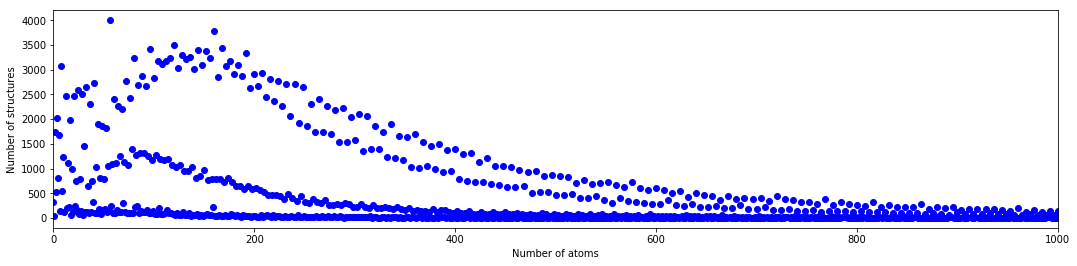

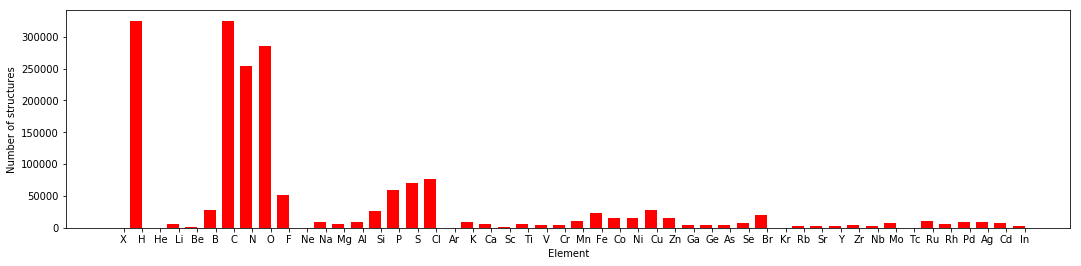

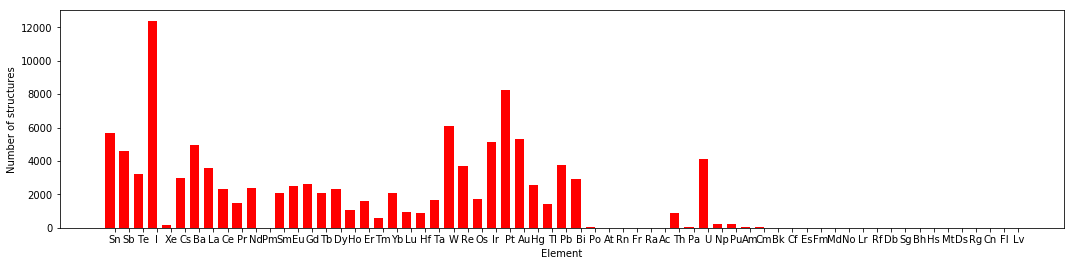

In [29]:
# plot structure analysis result

# plot number of atoms histogramm
fig = plt.figure(figsize=figuresize) #
#print atom_count_dict.keys()
y = [atom_count_dict[natom] for natom in atom_count_dict.keys()]
#print x
x = atom_count_dict.keys()
p1 = plot(x , y ,'bo')
xlabel("Number of atoms")
ylabel("Number of structures")
plt.xlim(0,1000)
# plot periodic table barchart (histogramm like)
# splitted into 2 charts, otherwise x labels overlap.
fig = plt.figure(figsize=figuresize) #
N = len(element_count_list)
ind = np.arange(N)    # the x locations for the groups
width = 0.65       # the width of the bars: can also be len(x) sequence

x = [e[0] for e in element_count_list]
y = [c[1] for c in element_count_list]
p2 = plt.bar(ind[:50], y[:50], width, color='r')
# TODO xticks size smaller, full axis
xticks(ind[:50] + width/2., x[:50])
xlabel("Element")
ylabel("Number of structures")
#p2.tick_params(axis='both', which='minor', labelsize=8)

fig = plt.figure(figsize=figuresize) #
p3 = plt.bar(ind[50:], y[50:], width, color='r')
#xt = get(gca, 'XTick')
#set(gca, 'FontSize', 10)
xticks(ind[50:] + width/2., x[50:])
xlabel("Element")
ylabel("Number of structures")

In [19]:
# more detail analysis of Calculations
print('\n\nMore detailed analysis of Calculations \n')


# TODO maybe sort per type
q = QB()
q.append(CalcJobNode, project=['id', 'ctime', 'mtime', 'node_type', 'process_type', 'attributes'], tag='calcs1')
t = time.time()
calcs = q.all()
elapsed = time.time() - t
print("Total number of Calculation: {} (retrieved in {} s.)".format(len(calcs), elapsed))

states = Counter([r[4] for r in calcs])
print("Number of Calculation by current state:")
for count, state in sorted((v, k) for k, v in states.items())[::-1]:
    print("{}  {}".format(count, state))

extra_count_dict = {} # { extra string : occurences, ...}
q = QB()
q.append(CalcJobNode)#, project=['extras','pbc'])#,'id', 'sites'])
calcs = q.all() 

for calc in calcs:
    # evaluate extras
    extras = calc[0].extras
    for key, val in extras.items():
        string = str(key) + ' : ' + str(val)
        extra_count_dict[string] = extra_count_dict.get(string, 0) + 1

print("\nExtra keys occurences:")
for occ, extra in sorted((v, k) for k, v in extra_count_dict.items())[:-50:-1]:
    print(" {} : {} ".format(occ, extra))
    # print only first 100?

# What type of calculations are there?

    
# computational time used
# total runtime of all calculation in DB
# calculation killed by scheduler?
# runtime histogramm of all calcs.
# I might what to know how long it would take to rerun things.
# or how, costly a database is



More detailed analysis of Calculations 

Total number of Calculation: 80822 (retrieved in 2.06039690971 s.)
Number of Calculation by current state:
49570  NEW
19467  FINISHED
8801  WITHSCHEDULER
1257  RETRIEVING
922  FAILED
399  TOSUBMIT
397  None
5  COMPUTED
2  SUBMITTING
1  SUBMISSIONFAILED
1  PARSINGFAILED

Extra keys occurences:
 80343 : project : COD inpgen test 
 80242 : program : inpgen_dev1@local 
 107 : simulation on : Al16Mg8O32 
 101 : program : inpgen_dev@local 
 59 : simulation on : Mg4O4 
 59 : simulation on : Cl4K4 
 50 : simulation on : Al24O32 
 47 : simulation on : Fe24O32 
 31 : simulation on : Mg24O32 
 27 : simulation on : Al16Ni8O32 
 26 : simulation on : Mg8O16Si4 
 26 : simulation on : As16S16 
 25 : simulation on : Mg16O48Si16 
 24 : simulation on : Ni4 
 24 : simulation on : Ca8Fe8O20 
 24 : simulation on : Ca4Mg4O24Si8 
 23 : simulation on : Ca4O20Si4Ti4 
 22 : simulation on : Fe2 
 22 : simulation on : Ca4O4 
 21 : simulation on : C16H28N4O12 
 19 : simula

In [18]:
# more detail analysis of Groups in the database

In [ ]:
# more information on workchains workcalculations in the database

In [19]:
# get path to database, get size, \l+
# get path to repo, get size, (du -h )
# also plot what takes up the most space

In [17]:
# more detail analysis of Connectiveness/proverance

# how may nodes are not 'connected at all' (no parents no children), 
# therefore not used and probably garbage?


# tree length and width histogram, of interest? how to travers an asyclic graph?

# what I have in mind here is: 
# is there only one type of calculations/ workflow in this db, or a lot
# of different ones? If every node is connected or has at least 
# certain generation depth exists, the db is probably from a(several) complete project(s).
# whereas if there are a lot of scattered nodes, there is either work in progress, 
# a lot of garbage, or even a bad designed plugin/AiiDA use which breaks provernace.


# If one even wants to test, if provernace is kept properly, 
# it might make sense to check if every jobcalculation can be tracked 
# back to a StructureData node

# harder problem might be:
# are there nodes which are exactly the same, doubled and so on?
# if yes one might want to create and run a 'reconnect tool'. I think this becomes important anyways when you merge
# databases

In [ ]:
# number of head nodes

In [ ]:
# number of child nodes

In [ ]:
# graph depth(length) distribution all walks from heads to children (might be hard/expensive since we ahve ayclic graphs!)

In [ ]:
# number of links (what links) distribution links per node (for different types)

In [ ]:
# number of nodes with no links at all

In [ ]:
# number of dead links (hard to test I imagine)

In [ ]:
# number of cycles on graph? (cycle radius)

In [ ]:
# Database and repo consistency
# all nodes have folders that exist?
# more folders that do not have nodes?